<a href="https://colab.research.google.com/github/da-head0/Female-led-Korean-Films/blob/master/Game_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
del df['Unnamed: 0']

In [4]:
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

In [5]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
#기존 Year열 데이터를 바탕으로 NaN값을 채워줌

df.Year = df.Year.interpolate(method='pad', limit=2) 

In [8]:
#Year 행 정수로 변환

df = df.astype({'Year': 'int'}) 

In [9]:
# 연도 맞춰주기

for i, year in enumerate(df['Year']):
  if year <50:
    df.loc[i,'Year'] = year + 2000
  if (50<= year <100 ):
    df.loc[i,'Year'] = year + 1900
  else:
    continue


In [10]:
df.groupby(by='Year').count().head(60)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
1980,10,10,9,10,10,10,10,10
1981,46,46,46,46,46,46,46,46
1982,37,37,37,37,37,37,37,37
1983,17,17,17,17,17,17,17,17
1984,14,14,14,14,14,14,14,14
1985,14,14,14,14,14,14,14,14
1986,21,21,21,21,21,21,21,21
1987,16,16,16,16,16,16,16,16
1988,15,15,15,15,15,15,15,15


In [11]:
for col in sales_df.columns:
  df[col] = df[col].str.replace('M','')  # remove M

In [12]:
# K값 지우고 해당 열에 대해 0.001배
for col in sales_df.columns:
  for i, sale in enumerate(df[col]):
    if sale.endswith('K'):
      df.loc[i,col] = float(df.loc[i,col].replace('K',''))*0.001
    else:
      continue

In [13]:
# Sales 칼럼들 숫자형으로 변환
for col in sales_df.columns:
  df[col] = pd.to_numeric(df[col])
  df[col] = df[col]*1000 #기본 단위를 K로 변경

In [14]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [15]:
df['Name'] = df['Name'].str.replace('챕','e') #이름에 한글 들어간 거 지워주기
df['Name'] = df['Name'].str.replace('징','')

In [16]:
df.groupby(by='Platform').count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,,,,
2600,133,133,132,133,133,133,133,133
3DO,3,3,3,3,3,3,3,3
3DS,509,509,508,507,509,509,509,509
DC,52,52,52,52,52,52,52,52
DS,2163,2163,2159,2156,2163,2163,2163,2163
GB,98,98,98,98,98,98,98,98
GBA,822,822,820,796,822,822,822,822
GC,556,556,555,556,556,556,556,556
GEN,27,27,27,27,27,27,27,27


2600은 Atari 2600을 말하는 거 같다. 1977년 10월 발매된 가정용 게임기로 마이크로프로세서와 카트리지 방식을 사용하였다고.

❓ 값이 6 이하로 들어간 건 지워줄까?

In [17]:
#세일즈 매출에 대한 합계, 평균 계산하기
sales_df = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

df['Sales_Sum'] = df['NA_Sales']+df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Sales_Mean'] = df['Sales_Sum']/4

In [18]:
df[(df.Genre.isnull()) & (df['Sales_Mean']>500)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170.0,4050.0,4340.0,790.0,14350.0,3587.5
4598,Wii Party,Wii,2010,NaN,Nintendo,1790.0,3530.0,2490.0,680.0,8490.0,2122.5
9488,Final Fantasy XII,PS2,2006,NaN,Square Enix,1880.0,0.0,2330.0,1740.0,5950.0,1487.5
12331,Onimusha: Warlords,PS2,2001,NaN,Virgin Interactive,990.0,480.0,1090.0,140.0,2700.0,675.0
15526,Bloodborne,PS4,2015,NaN,Sony Computer Entertainment,1000.0,760.0,260.0,360.0,2380.0,595.0
16587,Need for Speed Underground 2,XB,2004,NaN,Electronic Arts,1380.0,800.0,0.0,100.0,2280.0,570.0


매출 평균치 500 이상 값들은 장르를 찾아서 채워줬다. 1000 이상만 채워줘도 될 것 같았다... ㅎ

In [19]:
df.iloc[1971,3] = 'Role-Playing'
df.iloc[4598,3] = 'Misc' #Wii Party	- Party인데 일단 Misc로 넣음.
df.iloc[9488,3] = 'Role-Playing'
df.iloc[12331,3] = 'Action'
df.iloc[15526,3] = 'Action' #Action role-playing game 이지만 action으로 분류
df.iloc[16587,3] = 'Racing'

In [20]:
df = df.dropna(axis=0) #결측치 들어간 행 제거, 100개 정도

In [21]:
df.shape

(16496, 11)

In [22]:
df = df.reset_index(drop=True) #인덱스 리셋해줌

In [23]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0,10.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0,45.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,5.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0,10.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0,62.5
...,...,...,...,...,...,...,...,...,...,...,...
16491,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0,50.0
16492,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0,2.5
16493,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0,197.5
16494,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0,95.0


# 지역에 따라서 선호하는 게임 장르가 다를까?

클러스터링, K_MEANS 지역별로 해보면 되겠군

일단 T-Test
귀무가설 : 지역별로 선호하는 게임 장르에 차이가 없을 것이다
대립가설 : 지역별로 선호하는 게임 장르에 차이가 있을 것이다

In [24]:
df1 = df[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']] #장르, 매출만 모아서 1번 문제 df 생성
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40.0,0.0,0.0,0.0
1,Action,170.0,0.0,0.0,10.0
2,Adventure,0.0,0.0,20.0,0.0
3,Misc,40.0,0.0,0.0,0.0
4,Platform,120.0,90.0,0.0,40.0
...,...,...,...,...,...
16491,Platform,150.0,40.0,0.0,10.0
16492,Action,10.0,0.0,0.0,0.0
16493,Sports,440.0,190.0,30.0,130.0
16494,Action,50.0,50.0,250.0,30.0


In [25]:
df1genresum = df1.groupby(by='Genre').sum() #지역별로 장르별 매출 합계
df1genresum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,876510.0,523320.0,158790.0,186920.0
Adventure,105530.0,64000.0,51870.0,16810.0
Fighting,221530.0,100120.0,87340.0,36200.0
Misc,404270.0,213840.0,107720.0,74620.0
Platform,446440.0,201110.0,130650.0,51530.0
Puzzle,123350.0,50720.0,56870.0,12520.0
Racing,358570.0,237890.0,56400.0,77200.0
Role-Playing,326590.0,187620.0,351570.0,59490.0
Shooter,581910.0,313020.0,38280.0,102650.0


In [26]:
rank_by_sales = pd.DataFrame()

In [27]:
# 장르별 순위 매기기

rank_by_sales['NA'] = df1genresum['NA_Sales'].rank(ascending=False)
rank_by_sales['JP'] = df1genresum['JP_Sales'].rank(ascending=False)
rank_by_sales['EU'] = df1genresum['EU_Sales'].rank(ascending=False)
rank_by_sales['Other'] = df1genresum['Other_Sales'].rank(ascending=False)
rank_by_sales.sort_values(by='NA')

,NA,JP,EU,Other
Genre,,,,
Action,1.0,2.0,1.0,1.0
Sports,2.0,3.0,2.0,2.0
Shooter,3.0,12.0,3.0,3.0
Platform,4.0,4.0,6.0,7.0
Misc,5.0,5.0,5.0,5.0
Racing,6.0,9.0,4.0,4.0
Role-Playing,7.0,1.0,7.0,6.0
Fighting,8.0,6.0,9.0,8.0
Simulation,9.0,7.0,8.0,9.0


#그래프

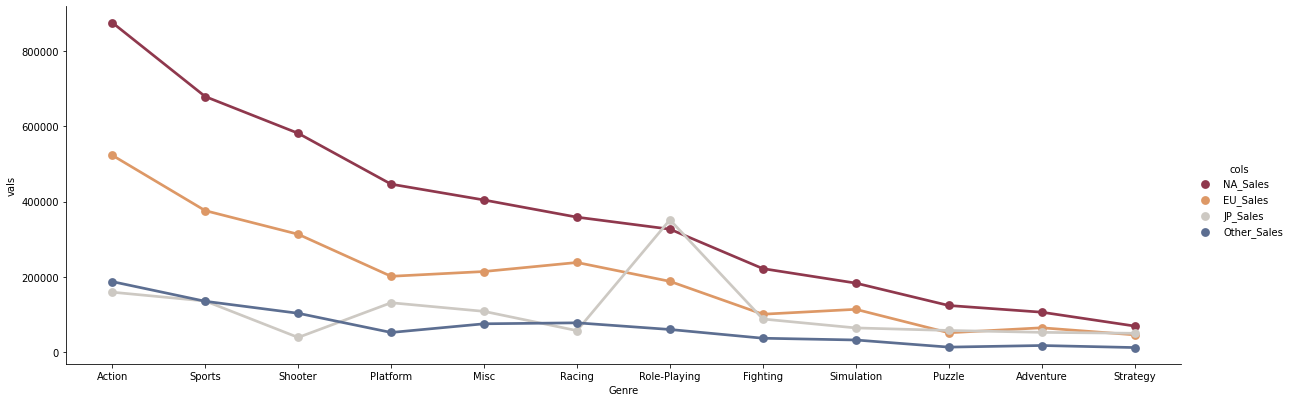

In [28]:
# 지역별 - 게임 장르별 매출 합계 그래프

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) #북미지역 매출 순위로 정렬
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#dd9866", "NA_Sales":"#8f384d", "Other_Sales":"#5c6e91", "JP_Sales":"#cdc9c3"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

👉 북미지역은 가장 매출이 높은 지역이다. 북미 지역의 매출 순위로 다른 지역들의 매출을 그려 보면, 북미와 유럽, 다른 지역의 장르별 매출액 그래프는 유사한 라인을 그리는 것을 볼 수 있다.

👉 유럽지역의 경우 1-3위는 북미와 같지만, 레이싱 게임이 플랫폼 게임보다 인기있다는 점이 북미와 다르다. (기타지역에서도 레이싱 게임은 4위다.)


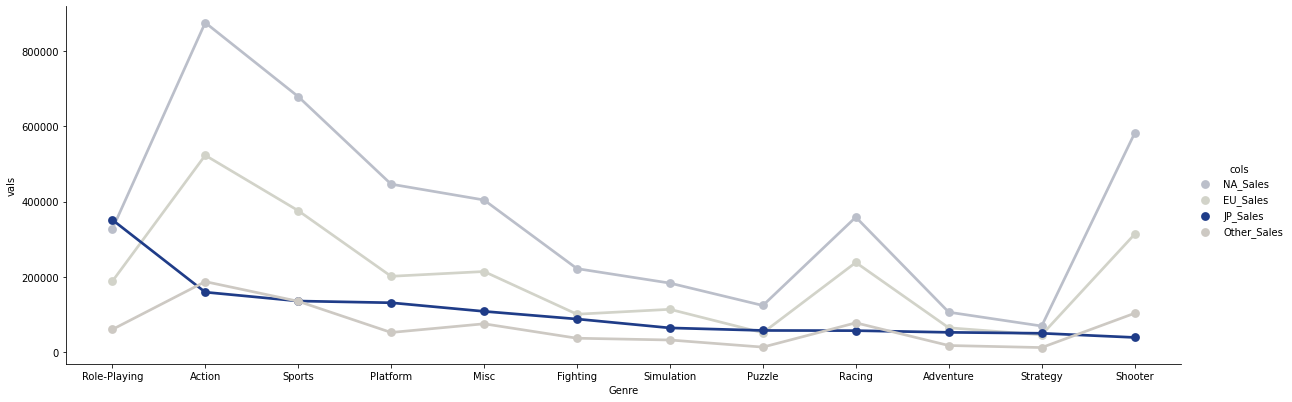

In [29]:
df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) #일본지역 매출 순위로 정렬
df1sum = df1genresum.reset_index().melt('Genre', var_name='cols',  value_name='vals')
palette = {"EU_Sales":"#d2d3c9", "NA_Sales":"#bbbfca", "Other_Sales":"#cdc9c3", "JP_Sales":"#1f3c88"}
sns.catplot(x="Genre", y="vals", hue='cols', data=df1sum, height=5.5, aspect=3, kind = 'point', palette=palette);

일본 지역을 기준으로 장르별 매출을 재정렬했다.

In [30]:
rank_by_sales.sort_values(by='JP') # 장르별 매출 순위 - 일본 기준

,NA,JP,EU,Other
Genre,,,,
Role-Playing,7.0,1.0,7.0,6.0
Action,1.0,2.0,1.0,1.0
Sports,2.0,3.0,2.0,2.0
Platform,4.0,4.0,6.0,7.0
Misc,5.0,5.0,5.0,5.0
Fighting,8.0,6.0,9.0,8.0
Simulation,9.0,7.0,8.0,9.0
Puzzle,10.0,8.0,11.0,11.0
Racing,6.0,9.0,4.0,4.0


👉 일본의 경우 북미, 유럽과 다르게 롤플레잉 게임이 가장 인기가 많다. 북미, 유럽의 경우 액션 게임이 1위로 매출이 다른 장르보다 두드러지만 압도적이지는 않은 반면, 일본의 롤플레잉 게임 매출은 2위인 액션 게임 매출과 2배 이상의 차이를 보인다. 

흥미로운 점은 북미, 유럽에서 인기있던 사격(Shooter) 게임의 경우 일본에서 가장 인기없는 장르에 속한다. 

레이싱 게임의 경우 다른 지역에서는 매출 4-6위인 반면, 일본에서는 9위로 인기 있는 편이 아니다.

반면 일본을 제외한 다른 지역에서 가장 인기 없는 장르는 전략(Strategy)이다.

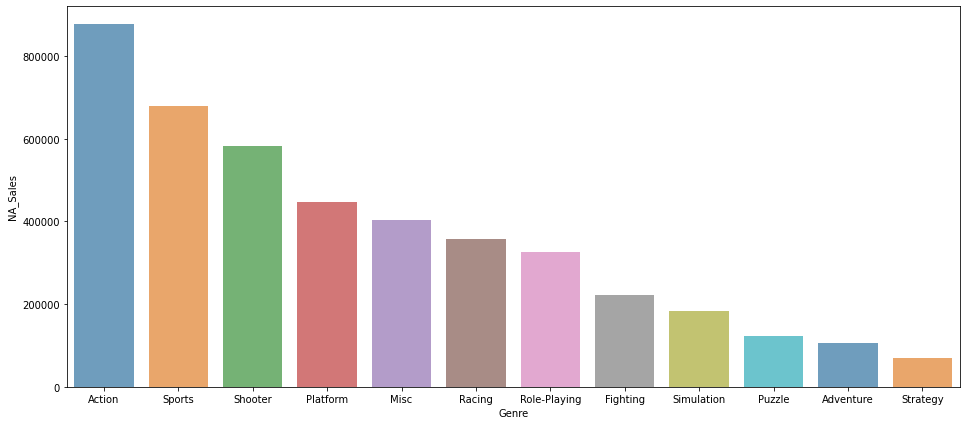

In [31]:
#북미지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='NA_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="NA_Sales", palette="tab10", alpha=.7);

👉 북미지역은 가장 매출이 높은 지역이다. 
액션, 스포츠, 사격, 플랫폼 게임이 강세를 보인다. 

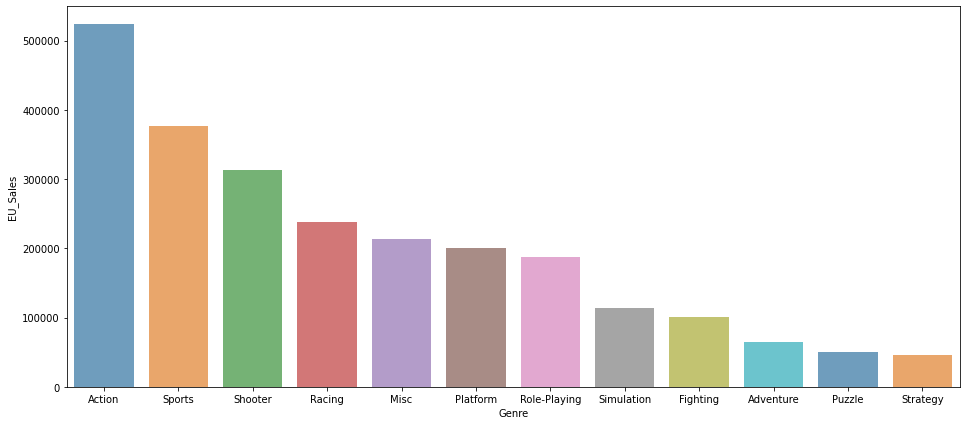

In [32]:
#유럽지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='EU_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="EU_Sales", palette="tab10", alpha=.7);

👉 유럽지역의 경우 1-3위는 북미와 같지만, 레이싱 게임이 플랫폼 게임보다 인기있다는 점이 북미와 다르다.



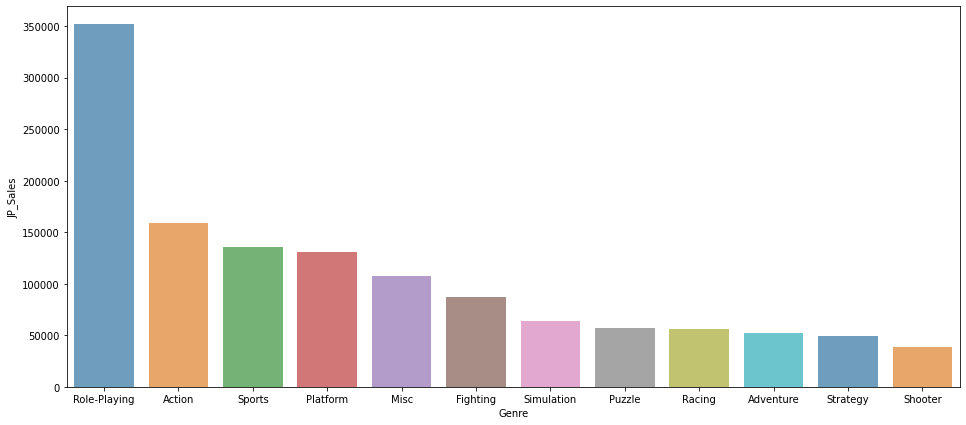

In [33]:
#일본 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='JP_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="JP_Sales", palette="tab10", alpha=.7);

👉 일본의 경우 북미, 유럽과 다르게 롤플레잉 게임이 가장 인기가 많다. 북미, 유럽의 경우 액션 게임이 1위로 매출이 다른 장르보다 두드러지만 압도적이지는 않은 반면, 일본의 롤플레잉 게임 매출은 2위인 액션 게임 매출과 2배 이상의 차이를 보인다. 

흥미로운 점은 북미, 유럽에서 인기있던 사격(Shooter) 게임의 경우 일본에서 가장 인기없는 장르에 속한다.

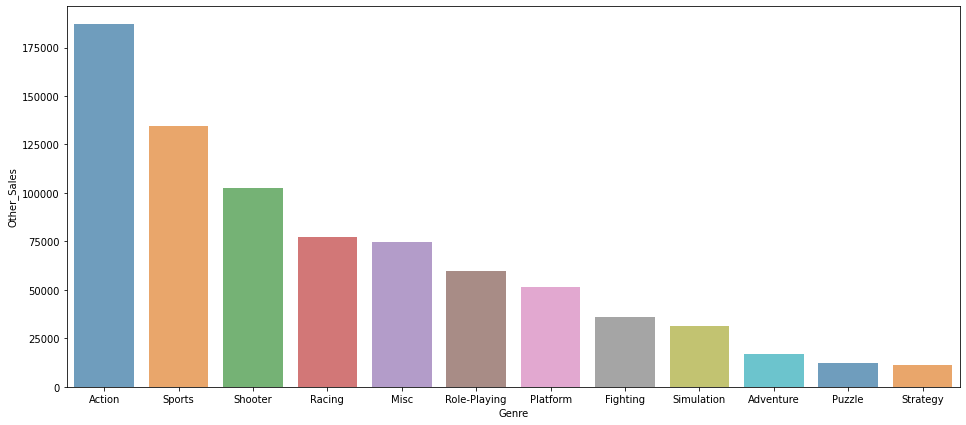

In [34]:
#기타지역 매출 순위로 정렬

df1genresum = df1genresum.sort_values(by='Other_Sales', ascending=False) 
plt.figure(figsize=(16, 7))
sns.barplot(data=df1genresum.reset_index(), x="Genre", y="Other_Sales", palette="tab10", alpha=.7);

# 연도별 게임의 트렌드가 있을까?

In [53]:
# 총매출 순위별로 정렬한 df 만들기

df2 = df.sort_values(by='Sales_Sum', ascending=False)[['Name',	'Platform',	'Year',	'Genre',	'Publisher', 'Sales_Sum']].reset_index()
del df2['index']
df2

,Name,Platform,Year,Genre,Publisher,Sales_Sum
0,Wii Sports,Wii,2006,Sports,Nintendo,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380.0
...,...,...,...,...,...,...
16491,Ouka Sengoku Portable,PSP,2012,Adventure,Alchemist,10.0
16492,Palais de Reine,PS2,2007,Strategy,Interchannel-Holon,10.0
16493,DoDonPachi Saidaioujou,X360,2013,Shooter,Cave,10.0
16494,Fate/kaleid liner Prisma Illya,3DS,2014,Action,Kadokawa Games,10.0


In [ ]:
yearcount = df2.groupby(by="Year").Name.count() #연도별 출시된 게임 숫자
yearcount

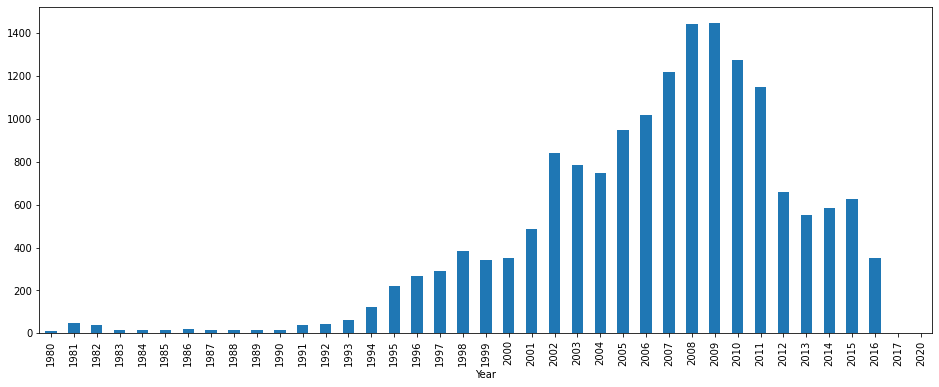

In [73]:
yearcount.plot(kind='bar', figsize=(16, 6));

94년도부터 한 해 출시되는 게임은 100개가 넘어, 2008-2009년에는 출시된 게임의 수가 가장 많았다. 2009년 이후부터는 하락세를 보인다.

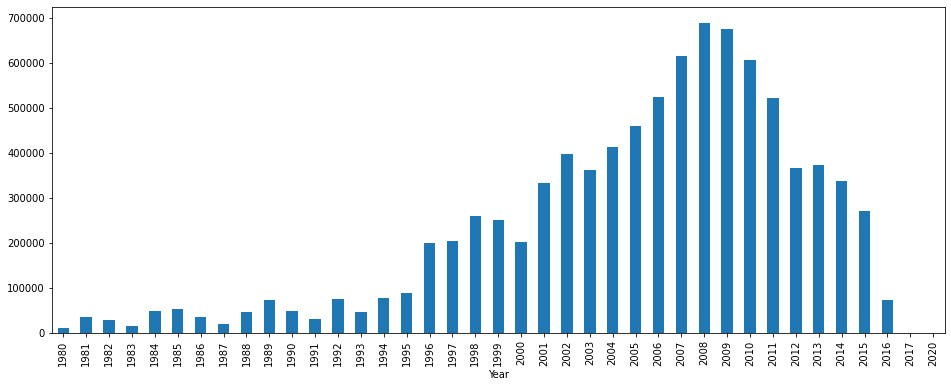

In [82]:
#연도별 게임 산업 매출 총액(모든 지역)

yearsales = df2.groupby(by="Year").Sales_Sum.sum()
yearsales.plot(kind='bar', figsize=(16, 6));

연도별 게임의 판매 총액 그래프다. 역시 2008-2009년이 매출이 가장 높아, 게임의 전성기였다는 것을 알 수 있다. 2008년 이후 하락세를 보인다. 

연도별 출시 게임 수는 1991년 이후 증가했는데, 그 전까지 게임의 매출은 들쭉날쭉했지만 어느정도 수요가 있었다. 1991년 이후,  발매되는 게임 수 증가와 더불어 매출 역시 비슷한 그래프를 그리며 늘었다.

흥미로운 점은 2013-2015년에 연도별 출시되는 게임의 수는 늘었지만, 게임의 매출은 계속 하락했다는 것이다. 

In [105]:
yeargenre  = df2.groupby(by=["Year", "Genre"]).count().reset_index()
yeargenre = yeargenre.iloc[:,0:3].rename(columns={'Name': 'Count'})
yeargenre

,Year,Genre,Count
0,1980,Action,2
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
383,2016,Sports,38
384,2016,Strategy,10
385,2017,Action,1
386,2017,Role-Playing,2


In [166]:
#연도순으로 나눠줌
early = df2[df2['Year'] <1995]
mid = df2[(1995<= df2['Year']) & (df2['Year']<2010)]
late = df2[df2['Year'] >=2010]

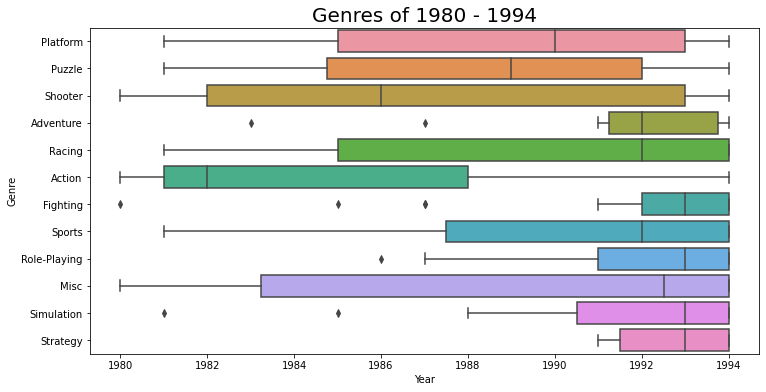

In [172]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = early.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1980 - 1994', fontsize = 20);

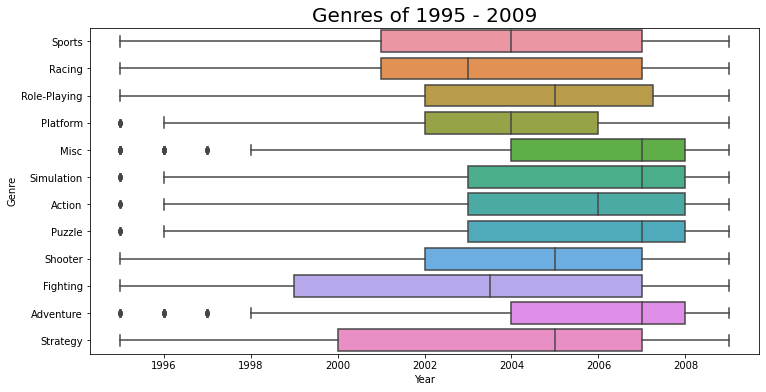

In [173]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = mid.reset_index(), x='Year', y='Genre');
plt.title('Genres of 1995 - 2009', fontsize = 20);

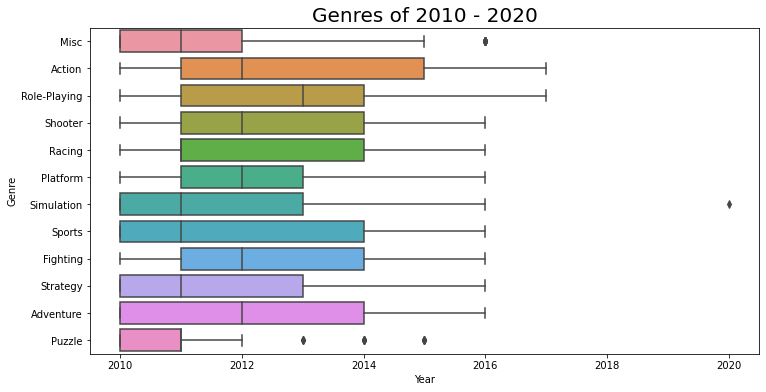

In [174]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = late.reset_index(), x='Year', y='Genre');
plt.title('Genres of 2010 - 2020', fontsize = 20);

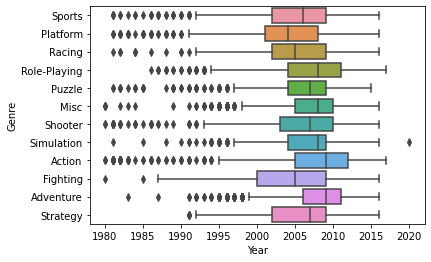

In [148]:
sns.boxplot(data = df2, x='Year', y='Genre');

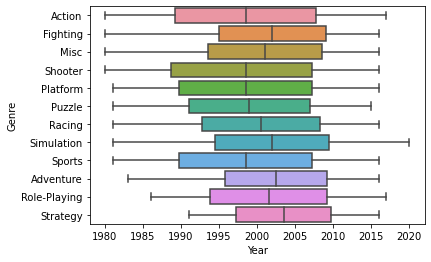

In [147]:
sns.boxplot(data = yeargenre, x='Year', y='Genre')

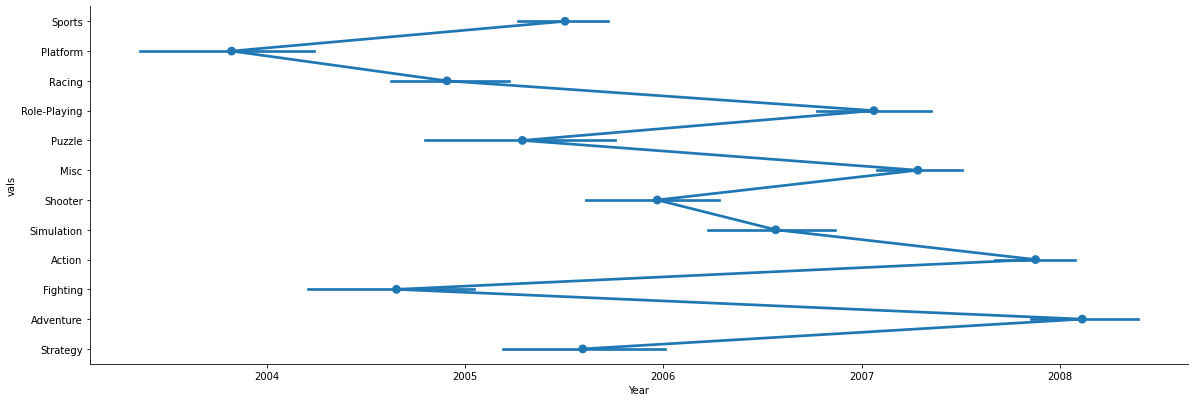

In [99]:
# yeargenre  = df2.groupby(by=["Year", "Genre"]).count().reset_index()
yeargenre_melt = df2.melt(id_vars=['Year'], value_vars=['Genre'], var_name='var',  value_name='vals')
sns.catplot(x="Year", y="vals", data=yeargenre_melt, height=5.5, aspect=3, kind = 'point');

In [47]:
df.groupby(by=["Year",'Platform']).count()

Name  Genre  Publisher  ...  Other_Sales  Sales_Sum  Sales_Mean
Year Platform                          ...                                    
1980 2600         8      8          8  ...            8          8           8
     X360         1      1          1  ...            1          1           1
1981 2600        46     46         46  ...           46         46          46
1982 2600        36     36         36  ...           36         36          36
     PS2          1      1          1  ...            1          1           1
...             ...    ...        ...  ...          ...        ...         ...
2016 X360         8      8          8  ...            8          8           8
     XOne        54     54         54  ...           54         54          54
2017 PS4          1      1          1  ...            1          1           1
     PSV          2      2          2  ...            2          2           2
2020 DS           1      1          1  ...            1          1           1

[328 rows x 9 columns]

# 매출이 높은 게임에 대한 분석 및 시각화 프로세스

In [36]:
df.sort_values(by=["Sales_Sum"], ascending=False)  # 매출 탑 100위 정렬

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum,Sales_Mean
2895,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0,20685.0
4173,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0,10060.0
12504,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0,8957.5
3337,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0,8250.0
7784,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0,7845.0
...,...,...,...,...,...,...,...,...,...,...,...
12142,Ouka Sengoku Portable,PSP,2012,Adventure,Alchemist,0.0,0.0,10.0,0.0,10.0,2.5
936,Palais de Reine,PS2,2007,Strategy,Interchannel-Holon,0.0,0.0,10.0,0.0,10.0,2.5
6430,DoDonPachi Saidaioujou,X360,2013,Shooter,Cave,0.0,0.0,10.0,0.0,10.0,2.5
5836,Fate/kaleid liner Prisma Illya,3DS,2014,Action,Kadokawa Games,0.0,0.0,10.0,0.0,10.0,2.5


-> 다음 분기 때 어떤 게임을 만들까?

# 개인적인 분석 목표, 질문

In [37]:
# Two Sample T-Test
import scipy.stats as stats
print("북미지역과 일본 비교 : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.JP_Sales))

북미지역과 일본 비교 :  Ttest_indResult(statistic=3.376238024954456, pvalue=0.0027212353068000643)


In [38]:
print("북미지역과 유럽 비교 : ", stats.ttest_ind(df1genresum.NA_Sales, df1genresum.EU_Sales))

북미지역과 유럽 비교 :  Ttest_indResult(statistic=1.94977163437725, pvalue=0.06406233427397107)


‼️ T-Test, 아노바는 평균 매기는거임... 장르별 랭킹 순위에는 적합하지 않다!

In [39]:
# Anova

import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
F_statistic, pVal = stats.f_oneway(rank_by_sales.NA, rank_by_sales.EU, rank_by_sales.JP, rank_by_sales.Other) 
print('4개 그룹데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

4개 그룹데이터의 일원분산분석 결과 : F=0.0, p=1.00000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


❓ 왜 아노바 p값이 다 1이 나오지...
랭킹 매기면 다 랭킹이 1-12위 순이라 pvalue가 똑같이 나오나?? 

4개 그룹의 장르별 매출 순위를 아노바 테스트로 비교한 결과 pvalue는 1이다. 



‼️ 초기에 설정한 목표에 대한 결론이 나와야 함

그래서 다음 분기에는 어떤 게임을 만들건데?

연도별 출시되는 게임 수와 매출액 연관성 비교 - 2sample chi-square test

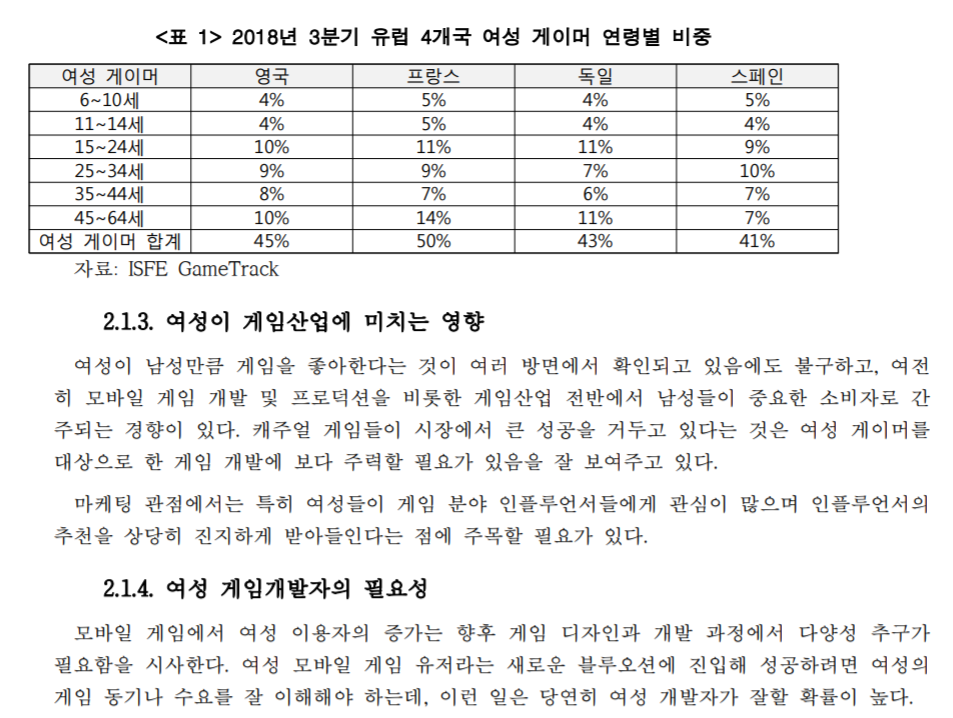

출처 : 북미 및 유럽 주요국 게임시장 현황조사, 2019